# Behavior Benchmark Tutorial

Every behavioral benchmark has two key components:
1. Behavioral Data (that is stored in a `BehaviorAssembly` object)
2. Metric - which defines how we want to compare the model measurements against the experimental data.


The data has two key components:
1. StimulusSet (subclass of pandas) - basically a master sheet which references which stimulus to present and where to find it.
2. DataAssembly (subclass of xarray) - the experimental data. (.nc file NETCDF)
These are packaged into a `BehaviorAssembly object`.

The StimulusSet has two key components:
1. CSV - metadata
2. Zipped folder containing the stimulus data.

## Data Requirements

In [1]:
import brainscore_vision
import pandas as pd
from PIL import Image
import xarray as xr

/opt/anaconda3/envs/benchmark/lib/python3.11/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


### Load the data

The `load_dataset` function will load the StimulusSet and DataAssembly to your `.brainio` folder.

In [28]:
# Here the data identifier can be used to easily load the data.
behavior_data = brainscore_vision.load_dataset("Ferguson2024_circle_line")
behavior_data

<xarray.BehavioralAssembly 'data' (presentation: 4292)>
dask.array<open_dataset-86dcbcc3909a814b265ed8b10142fcc8data, shape=(4292,), dtype=int64, chunksize=(4292,), chunktype=numpy.ndarray>
Coordinates:
  * presentation       (presentation) MultiIndex
  - stimulus_id        (presentation) object 'first_block_11' ... 'first_bloc...
  - stimulus_id_long   (presentation) object 'https://mferg-mturk.s3.us-east-...
  - participant_id     (presentation) object '615e566986c5fd30acb3cec9' ... '...
  - response_time_ms   (presentation) float64 6.598e+03 554.0 ... 658.0 892.0
  - correct            (presentation) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
  - target_present     (presentation) int64 0 1 1 1 1 0 1 1 ... 1 1 1 1 0 1 0 0
  - distractor_nums    (presentation) object '11.0' '1.0' ... '11.0' '11.0'
  - block              (presentation) object 'first' 'first' ... 'first' 'first'
  - keypress_response  (presentation) object 'j' 'f' 'f' 'f' ... 'j' 'f' 'j' 'j'
  - trial_type         (presentation) object 'normal' 'normal' ... 'normal'
  - filename           (presentation) object 'first_block_11.png' ... 'first_...
  - image_number       (presentation) int64 11 0 4 10 12 9 2 ... 6 16 13 4 5 11
Attributes:
    stimulus_set_identifier:  Ferguson2024_circle_line
    stimulus_set:                            filename      stimulus_id   bloc...
    identifier:               Ferguson2024_circle_line

<img src="./assets/behavior_brainio.png" width="750">

We can navigate to the folder to see the data or we can just reference the `behavior_data` object.

In this Ferguson2024 dataset, the data is stored in a behaviorAssembly.

This BehaviorAssembly is made up a DataAssembly and a StimulusSet. The DatAssembly is stored within the `data` dimension, and the StimulusSet is stored in the `attrs` dictionary. The StimulusSet is a subclass of pandas and is essentially a 2D dataframe, and the DataAssembly is a subclass of xarray.

Within the `data` dimension, we have 4292 presentations, which refers to the presentation of a stimulus to a subject. Te values in this case then correspond to the responses of subjects to the stimuli.


In [3]:
print(f"The type of the StimulusSet is {type(behavior_data.attrs['stimulus_set'])}")
print(f"The type of the DataAssembly is {type(behavior_data)}")

The type of the StimulusSet is <class 'brainio.stimuli.StimulusSet'>
The type of the DataAssembly is <class 'brainio.assemblies.BehavioralAssembly'>


### StimulusSet

#### We can access to the StimulusSet data from the csv file stored in the `.brainio` folder.

In [4]:
sample_csv = pd.read_csv('/Users/kartik/.brainio/stimulus_Ferguson2024_circle_line/stimulus_Ferguson2024_circle_line.csv')
sample_csv.head(10)


,filename,stimulus_id,block,image_number
0,second_block_2.png,second_block_2,second,2
1,first_block_22.png,first_block_22,first,22
2,second_block_16.png,second_block_16,second,16
3,second_block_17.png,second_block_17,second,17
4,first_block_23.png,first_block_23,first,23
5,second_block_3.png,second_block_3,second,3
6,second_block_1.png,second_block_1,second,1
7,first_block_9.png,first_block_9,first,9
8,first_block_21.png,first_block_21,first,21
9,second_block_15.png,second_block_15,second,15


In [5]:
print(f"The size of the StimulusSet CSV is {sample_csv.shape}")

The size of the StimulusSet CSV is (48, 4)


#### We can also access the StimulusSet directly from the `behavior_data` object.

In [6]:
# behavior_data.stimulus_set[:10] also achieves the same result
behavior_data.attrs['stimulus_set'][:10]

,filename,stimulus_id,block,image_number
0,second_block_2.png,second_block_2,second,2
1,first_block_22.png,first_block_22,first,22
2,second_block_16.png,second_block_16,second,16
3,second_block_17.png,second_block_17,second,17
4,first_block_23.png,first_block_23,first,23
5,second_block_3.png,second_block_3,second,3
6,second_block_1.png,second_block_1,second,1
7,first_block_9.png,first_block_9,first,9
8,first_block_21.png,first_block_21,first,21
9,second_block_15.png,second_block_15,second,15


In [7]:
print(f"The type of the StimulusSet is {type(behavior_data.attrs['stimulus_set'])}")

The type of the StimulusSet is <class 'brainio.stimuli.StimulusSet'>


### StimulusSet Data
#### We can also access the stimulus data using information directly from the `behavior_data` object.

More information: [`get_stimulus()`](https://github.com/brain-score/brainio/blob/acff11f170c4486704af68bb893a887b6cbd3f9d/brainio/stimuli.py#L18)

This is a function that will retrieve the local path to the stimulus data.

The path to the stimulus is /Users/kartik/.brainio/stimulus_Ferguson2024_circle_line/second_block_2.png


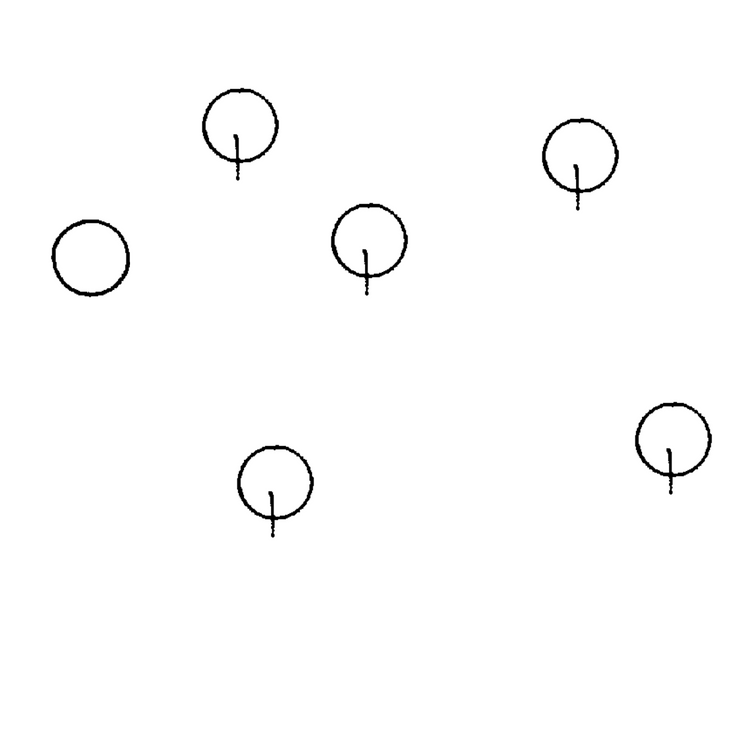

In [8]:
# We want to display the stimulus for the stimulus_id below
stimulus_id = 'second_block_2'
stimulus_path = behavior_data.attrs['stimulus_set'].get_stimulus(stimulus_id)
print(f"The path to the stimulus is {stimulus_path}")
Image.open(stimulus_path)

### DataAssembly

#### You can access the DataAssembly from the `.brainio` folder by treating it as a standard NetCDF file.

In [9]:
# The DataAssembly is a subclass of xarray, saved as a NetCDF file.
dataAssembly = xr.open_dataset('/Users/kartik/.brainio/assy_Ferguson2024_circle_line/assy_Ferguson2024_circle_line.nc')
dataAssembly

<xarray.Dataset>
Dimensions:            (presentation: 4292)
Coordinates:
    stimulus_id        (presentation) object ...
    stimulus_id_long   (presentation) object ...
    participant_id     (presentation) object ...
    response_time_ms   (presentation) float64 ...
    correct            (presentation) int64 ...
    target_present     (presentation) int64 ...
    distractor_nums    (presentation) object ...
    block              (presentation) object ...
    keypress_response  (presentation) object ...
    trial_type         (presentation) object ...
Dimensions without coordinates: presentation
Data variables:
    data               (presentation) int64 ...
Attributes:
    stimulus_set_identifier:  Ferguson2024_circle_line

#### The preferred way is to interact directly with the `behavior_data` object via the coordinates.

`behavior_data[{coordinate_name}]`

In [10]:
behavior_data['stimulus_id'].values


array(['first_block_11', 'first_block_0', 'first_block_4', ...,
       'first_block_4', 'first_block_5', 'first_block_11'], dtype=object)

In [11]:
print(f"The number of unique stimuli: {len(set(behavior_data['stimulus_id'].values))}")
print(f"The number of unique subjects: {len(set(behavior_data['participant_id'].values))}")
print(f"The number of observations: {len(behavior_data)}")

The number of unique stimuli: 48
The number of unique subjects: 30
The number of observations: 4292


In [12]:
type(behavior_data.coords)

xarray.core.coordinates.DataArrayCoordinates

In [13]:
df = behavior_data.to_dataframe()
df

,,,,,,,,,,,,data
stimulus_id,stimulus_id_long,participant_id,response_time_ms,correct,target_present,distractor_nums,block,keypress_response,trial_type,filename,image_number,
first_block_11,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/11.png,615e566986c5fd30acb3cec9,6598.0,1,0,11.0,first,j,normal,first_block_11.png,11,1
first_block_0,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/0.png,615e566986c5fd30acb3cec9,554.0,1,1,1.0,first,f,normal,first_block_0.png,0,1
first_block_4,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/4.png,615e566986c5fd30acb3cec9,861.0,1,1,11.0,first,f,normal,first_block_4.png,4,1
first_block_10,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/10.png,615e566986c5fd30acb3cec9,643.0,1,1,11.0,first,f,normal,first_block_10.png,10,1
first_block_12,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/12.png,615e566986c5fd30acb3cec9,671.0,1,1,1.0,first,f,normal,first_block_12.png,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
first_block_16,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/16.png,606e2c6d64e3ba353fb68bd5,590.0,1,1,11.0,first,f,normal,first_block_16.png,16,1
first_block_13,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/13.png,606e2c6d64e3ba353fb68bd5,729.0,1,0,1.0,first,j,normal,first_block_13.png,13,1
first_block_4,https://mferg-mturk.s3.us-east-2.amazonaws.com/oddball_experiments/PROLIFIC_circle_line_rereun/first_block/trial/4.png,606e2c6d64e3ba353fb68bd5,683.0,1,1,11.0,first,f,normal,first_block_4.png,4,1


#### The responses of the subjects are stored in the `data` dimension.

In [15]:
behavior_data.values

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
sum(behavior_data.values==behavior_data["target_present"].values)/len(behavior_data)

0.478331780055918

As we can see, much of the BehaviorAssembly is actually just a 2D array of data. The columns are the coordinates, and the rows are dimensions.

What Brain-Score will essentially do is iterate over the rows in the DataAssembly, look at `stimulus_id`, retrieve the stimulus from the StimulusSet, test the model on it, and retrieve the model's response. Repeat this X times, and then compare the model's response to the experimental data using the Metric.